### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [267]:
#Import Library
# Eugene Abigail Setiawan - 0706022210061
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

1. display 5 columns from dataset

In [268]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/eabigails/Week3_Data-Mining/main/MBA.csv', delimiter=',')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [269]:
#2
df.info()
#conclusion
# There is 10 columns (0-9) consist of int, object, bool and float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [270]:
#3a
print("admission:")
admission_counts = df['admission'].value_counts(dropna=False)
print(admission_counts)

admission:
NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64


In [271]:
#3b

print("race:")
admission_counts = df['race'].value_counts(dropna=False)
print(admission_counts)

race:
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [272]:
#4
df['admission'] = df['admission'].fillna('deny')

df['race'] = df['race'].fillna('other')

print(df[['race', 'admission']].info())
print(df[['race', 'admission']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   race       6194 non-null   object
 1   admission  6194 non-null   object
dtypes: object(2)
memory usage: 96.9+ KB
None
       race admission
0     Asian     Admit
1     Black      deny
2     other     Admit
3     Black      deny
4  Hispanic      deny


5. recheck missing value

In [273]:
#5
df.isnull().sum()


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [274]:
# 6
df = df.drop(columns=['application_id'])

7. show describe column and conclude what the insight is from that column

In [275]:
#7
df.describe()
#conclusion
# with describe we can easily see the numerical calculation of the int data type


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

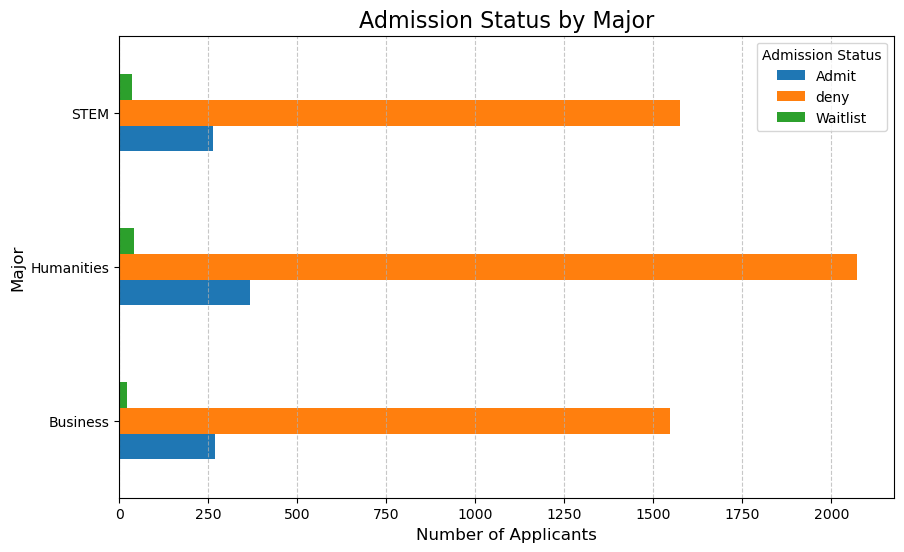

In [276]:
#8

# Group data by major and admission status, then count the occurrences
admis_counts = df.groupby(['major', 'admission']).size().unstack(fill_value=0)

# Create a horizontal bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
admis_counts = admis_counts[['Admit', 'deny', 'Waitlist']]
admis_counts.plot(kind='barh', stacked=False, figsize=(10, 6), color=colors)

# Customize the chart
plt.title('Admission Status by Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Admission Status', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.show()

# conclusion
# humanities has the most denied admission yet they are also they have the most admitted. while both STEM and Business is both neck-to-neck


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

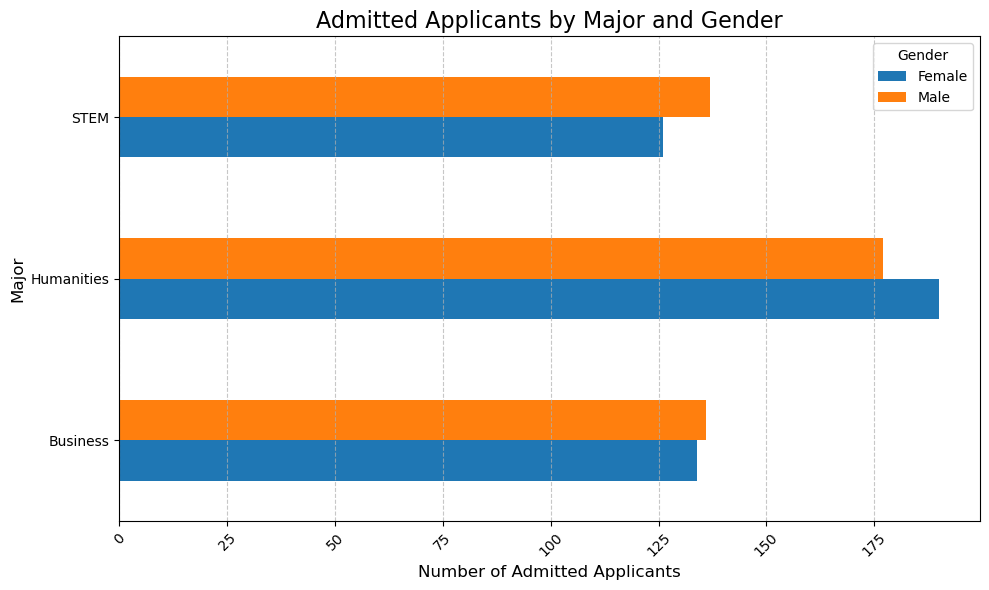

In [277]:
#9

# Filter the DataFrame to include only admitted applicants
admitted_df = df[df['admission'] == 'Admit']
# Group data by major and gender, then count the occurrences
admission_gender_counts = admitted_df.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Create a horizontal bar chart
admission_gender_counts.plot(kind='barh', stacked=False, figsize=(10, 6))

# Customize the chart
plt.title('Admitted Applicants by Major and Gender', fontsize=16)
plt.xlabel('Number of Admitted Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

# conclusion
# in STEM 

10. create your own insightful visualization and explain it in at least 2 sentences

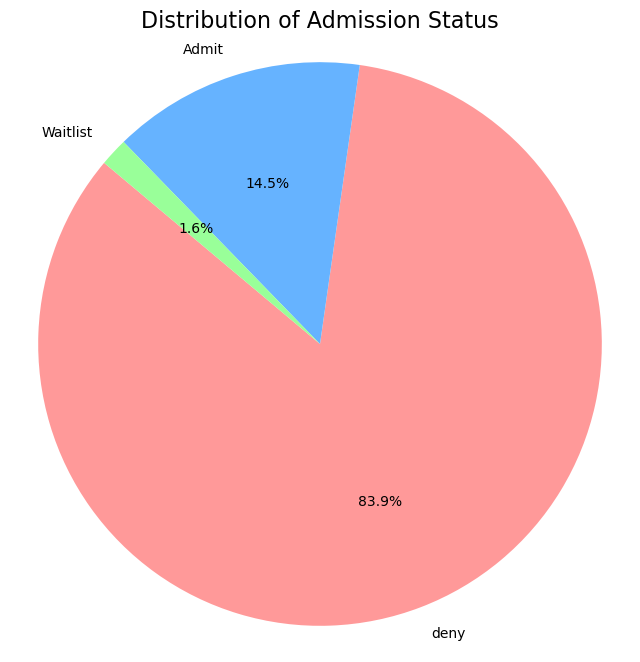

In [278]:
# I am making a Pie Chart for the distribution of admission status. 
# From this chart we can see how many that got admitted, denied, or waitlisted. 

# Fill NaN values in the 'admission' column with "deny"
df['admission'] = df['admission'].fillna('deny')  # You can also keep NaN if you prefer

# Count the occurrences of each admission status
admission_counts = df['admission'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Admission Status', fontsize=16)

# Show the chart
plt.axis('equal') 
plt.show()

11. create your own insightful visualization and explain it in at least 2 sentences

C:\Users\yulia\AppData\Local\Temp\ipykernel_17020\478600696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admitted_df['gpa'] = admitted_df['gpa'].fillna(0)
C:\Users\yulia\AppData\Local\Temp\ipykernel_17020\478600696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admitted_df['work_exp'] = admitted_df['work_exp'].fillna(0)


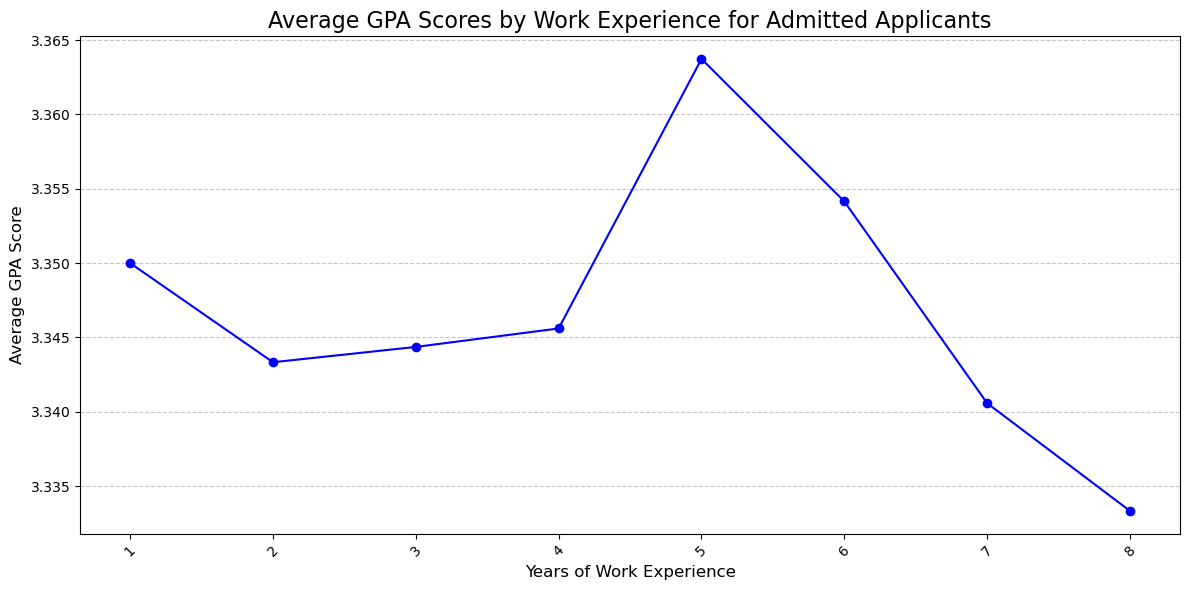

In [279]:
# Using line chart, I'm trying to find how high their gmat score based on their work_exp
# The result is the applicant with 5 years of experience has the highest GPA among all of them.


# Fill NaN values in the 'admission' column with "deny"
df['admission'] = df['admission'].fillna('deny')

# Filter the DataFrame to include only admitted applicants
admitted_df = df[df['admission'] == 'Admit']
admitted_df['gpa'] = admitted_df['gpa'].fillna(0)
admitted_df['work_exp'] = admitted_df['work_exp'].fillna(0)

    # Group data by work experience and calculate the average GMAT score
average_gmat_by_work_exp = admitted_df.groupby('work_exp')['gpa'].mean().reset_index()

    # Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(average_gmat_by_work_exp['work_exp'], average_gmat_by_work_exp['gpa'], marker='o', linestyle='-', color='b')

    # Customize the chart
plt.title('Average GPA Scores by Work Experience for Admitted Applicants', fontsize=16)
plt.xlabel('Years of Work Experience', fontsize=12)
plt.ylabel('Average GPA Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the chart
plt.tight_layout()
plt.show()



12. encode categorical columns and display the results

In [280]:
#12

# Encode categorical columns (except the admission column)

df['admission'] = df['admission'].fillna('deny')

label_encoders = {}
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']  # Columns you want to encode
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [281]:
admission_encoder = LabelEncoder()
df['admission'] = admission_encoder.fit_transform(df['admission'])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

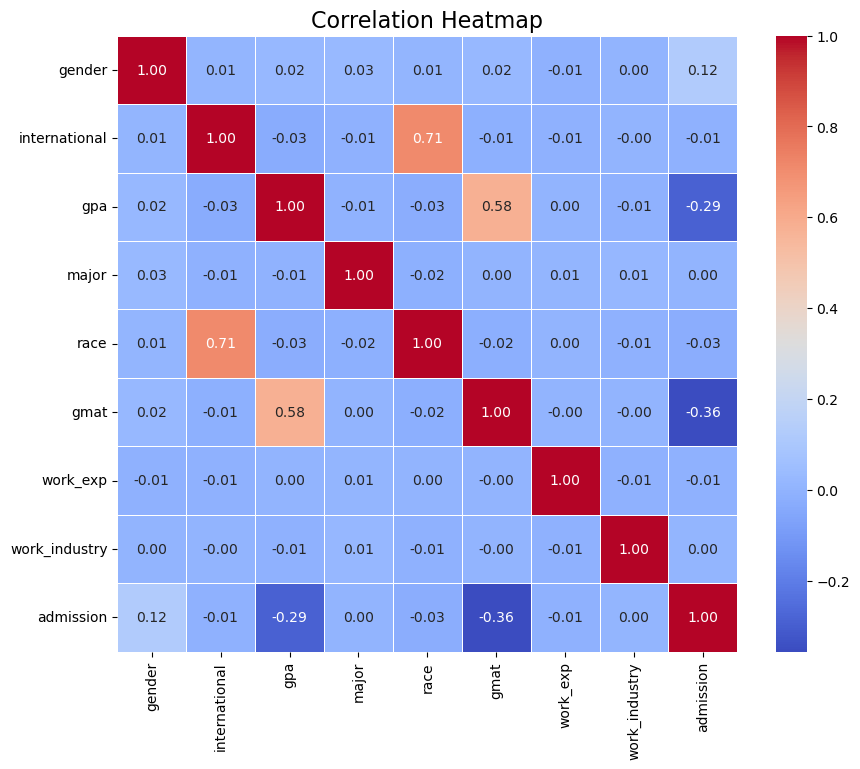

In [282]:
#13

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#Conclusion
# gpa and gmat positive correlation shows that people with higher gpa have a higher gmat
# there is a high positive correlation (0.71) between race and international. This suggests that applicants who are international may belong to specific racial categories in this dataset.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [283]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = df.drop(columns=['admission'])
y = df['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.77


In [286]:

# Get the average GPA of all applicants
average_gpa = df['gpa'].mean()


# Let's map the exact values from the dataset to Lisa's profile
lisa_data = {
    'gender': le_dict['gender'].transform([df['gender'].unique()[0]])[0],  # Assuming Female is the first value
    'international': le_dict['international'].transform([df['international'].unique()[0]])[0],  # Assuming local (No)
    'gpa': average_gpa,  # The average GPA of all applicants
    'major': le_dict['major'].transform([df['major'].unique()[1]])[0],  # Assuming Entrepreneurship or similar
    'race': le_dict['race'].transform([df['race'].unique()[0]])[0],  # Assuming Asian or similar
    'gmat': 580,  # Lisa's GMAT score
    'work_exp': 2,  # Lisa worked from 2018 to 2020 (2 years of work experience)
    'work_industry': le_dict['work_industry'].transform([df['work_industry'].unique()[2]])[0],  # Assuming Finance
}

# Create a DataFrame with Lisa's data
lisa_df = pd.DataFrame([lisa_data])

# Make a prediction using the trained model
lisa_prediction = model.predict(lisa_df)

# Decode the prediction back to the original label
lisa_admission_status = le_dict['admission'].inverse_transform(lisa_prediction)[0]

# Display the prediction result
print(f"Prediction for Lisa: {'Accepted' if lisa_admission_status == 'Admit' else 'Denied'}")

Prediction for Lisa: Denied
